In [145]:
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
with open("../Makemore/names.txt") as f:
    names = f.readlines()

In [3]:
names = [name.strip() for name in names]

In [4]:
char_set = sorted(list({c for name in names for c in name}))
char_set.insert(0, '.')
len(char_set)

27

In [5]:
stoi = {char: i for i, char in enumerate(char_set)}
itos = {i: char for char, i in stoi.items()}

In [43]:
block_size = 3
X, Y = [], []
for name in names:
    name = '.' * block_size + name + '.'
    for i in range(len(name) - block_size):
        context = name[i: i+block_size]
        X.append([stoi[char] for char in context])
        Y.append(stoi[name[i+block_size]])

X = torch.tensor(X)
Y = torch.tensor(Y)

In [168]:
train_idx, val_idx, test_idx = torch.utils.data.random_split(range(X.shape[0]), [0.8, 0.1, 0.1])
X_train, Y_train = X[train_idx], Y[train_idx]
X_val, Y_val = X[val_idx], Y[val_idx]
X_test, Y_test = X[test_idx], Y[test_idx]

In [169]:
len(train_idx),  len(val_idx), len(test_idx), len(train_idx) + len(val_idx) + len(test_idx)

(182517, 22815, 22814, 228146)

In [170]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [199]:
gen = torch.Generator().manual_seed(2147483647)
C =  torch.randn((27, 10))
W1 = torch.randn((30, 200))
B1 = torch.randn(200)
W2 = torch.randn((200, 27))
B2 = torch.randn(27)
parameters = [C, W1, B1, W2 ,B2]

In [200]:
# Number of parameters in the network
sum(p.nelement() for p in parameters)

11897

In [201]:
for param in parameters:
    param.requires_grad = True

In [78]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10 ** lre

In [202]:
stepi = []
lossi = []

In [203]:
logits.shape, Y_train[ix].shape

(torch.Size([32, 27]), torch.Size([32]))

In [218]:
for i in range(30000):
    # Create a mini batch to optimize the model faster
    ix = torch.randint(0, X_train.shape[0], (64,))
    out = torch.tanh(torch.matmul(C[X_train[ix]].view(-1, 30), W1) + B1)
    
    logits = torch.matmul(out, W2) + B2
    
    # counts = logits.exp()
    # probs = torch.div(counts, counts.sum(dim=1, keepdims=True))
    # loss = -probs[torch.arange(X.shape[0]), Y].log().mean()
    loss = F.cross_entropy(logits, Y_train[ix])
#     print(f"loss = {loss}")
    
    loss.backward()
    lr = 0.001
    for param in parameters:
        param.data += -lr * param.grad
        param.grad = None
    stepi.append(i)
    lossi.append(loss.log10().item())
print(f"loss = {loss}")

loss = 2.2339541912078857


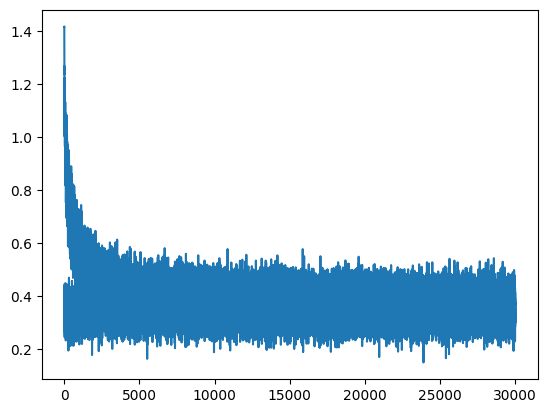

In [215]:
plt.plot(stepi, lossi)

In [219]:
# Loss on all of the training set
out = torch.tanh(torch.matmul(C[X_train].view(-1, 30), W1) + B1)
logits = torch.matmul(out, W2) + B2
loss = F.cross_entropy(logits, Y_train)
print(f"loss = {loss}")

loss = 2.204454183578491


In [220]:
# loss on the validation set
out = torch.tanh(torch.matmul(C[X_val].view(-1, 30), W1) + B1)
logits = torch.matmul(out, W2) + B2
loss = F.cross_entropy(logits, Y_val)
print(f"loss = {loss}")

loss = 2.2183454036712646


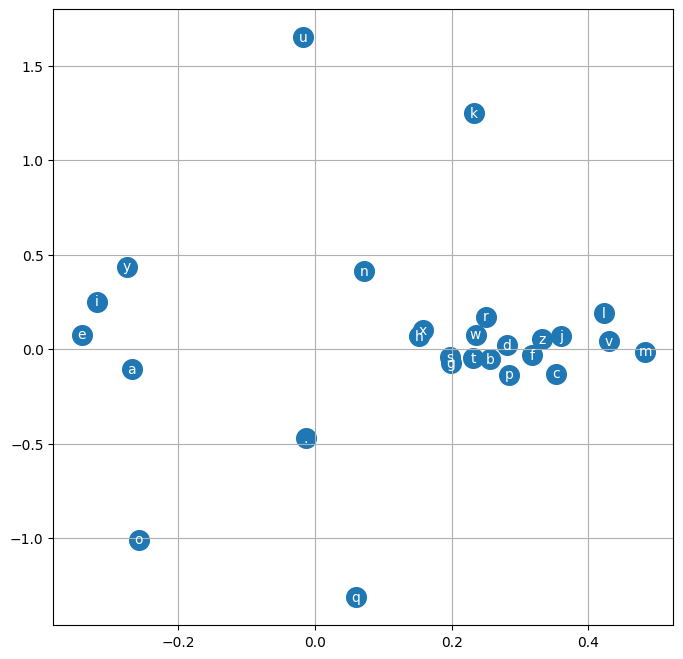

In [144]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [223]:
# sample from the model
g = torch.Generator().manual_seed(2147483647)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + B1)
      logits = h @ W2 + B2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

junide.
janasar.
parsay.
adin.
kohin.
tolian.
juhmerslania.
zamilenias.
deyailroiry.
din.
sinayla.
telinvelyn.
afonturj.
phynsleigh.
ani.
core.
yaen.
cary.
jamillerimois.
wyn.
